In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
ifng = sc.read('/home/icb/lea.zimmermann/projects/pertot/data/satija_h5ad/INS_Perturb_seq.h5ad')

In [3]:
ifng_total = ifng
ifng_total

AnnData object with n_obs × n_vars = 431457 × 34025
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'bc1_well', 'bc2_well', 'bc3_well', 'percent.mito', 'cell_type', 'RNA_snn_res.0.9', 'seurat_clusters', 'sample_ID', 'Batch_info', 'guide', 'gene', 'mixscale_score'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [4]:
sc.pp.highly_variable_genes(ifng_total, inplace=True, n_top_genes=2000)
ifng_total = ifng_total[:,ifng_total.var["highly_variable"]==True]
sc.pp.pca(ifng_total)

/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


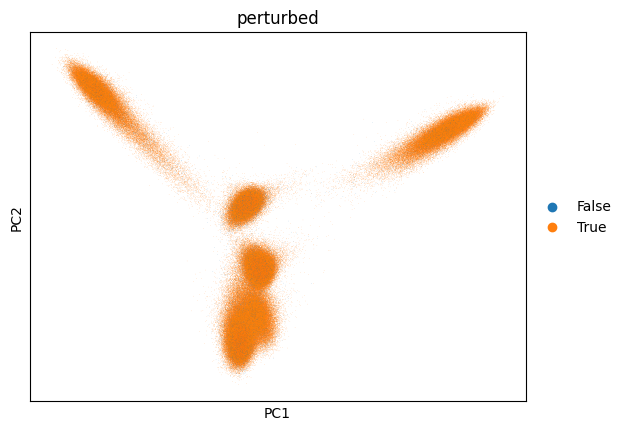

In [5]:
ifng_total.obs['perturbed'] = ifng_total.obs['gene'] != 'NT'
sc.pl.pca(ifng_total, color='perturbed')

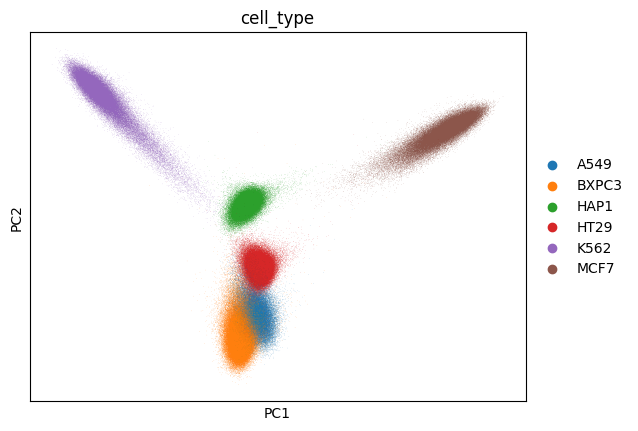

In [6]:
sc.pl.pca(ifng_total, color='cell_type')

In [7]:
cell_line_adata = []
for cl in ifng.obs['cell_type'].unique():
    adata = ifng[ifng.obs['cell_type'] ==  cl, :]
    sc.pp.highly_variable_genes(adata, inplace=True, n_top_genes=2000)
    adata = adata[:,adata.var["highly_variable"]==True]
    sc.pp.pca(adata)
    cell_line_adata.append(adata)

/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: Im

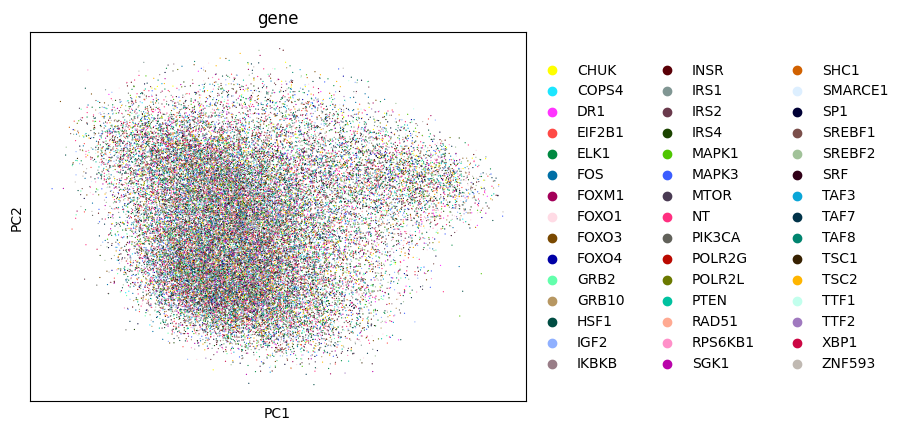

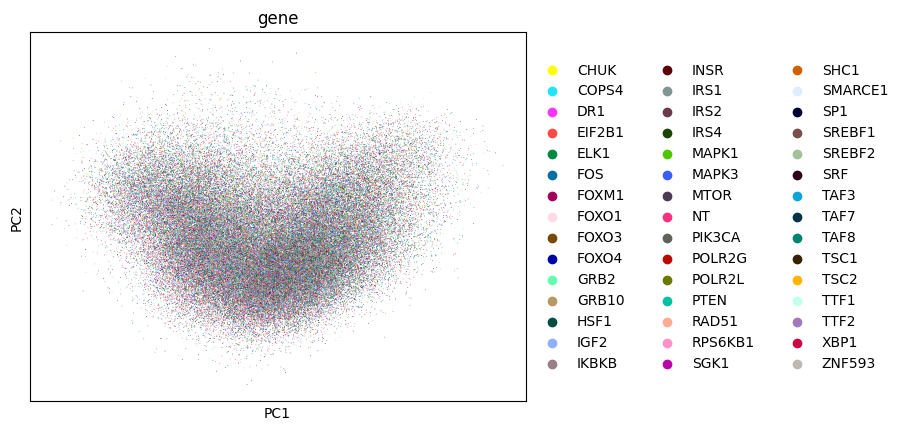

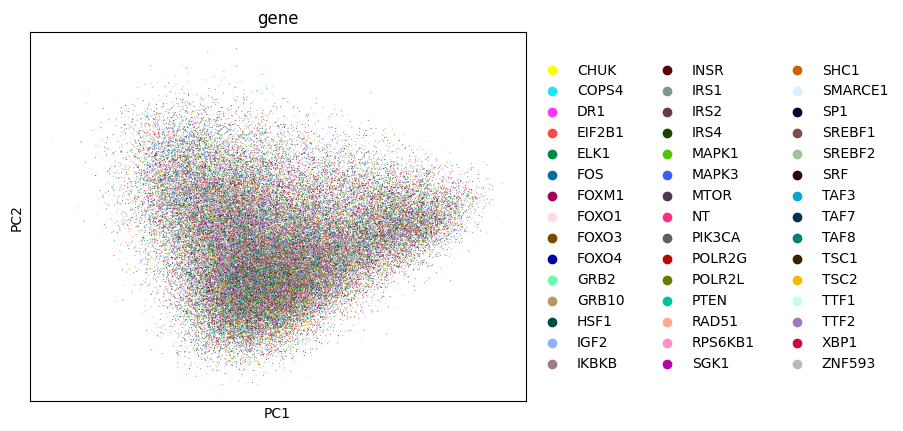

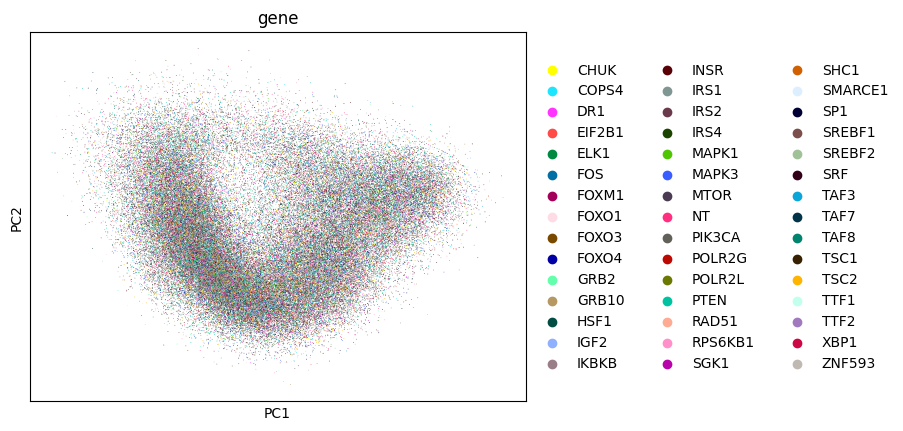

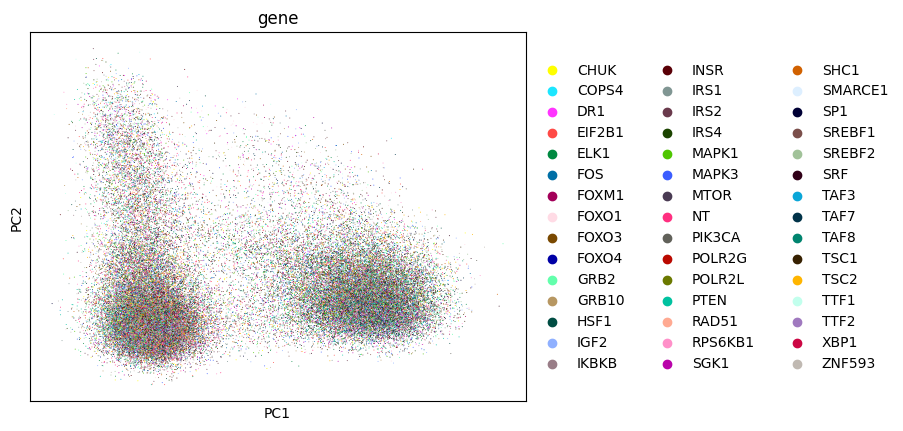

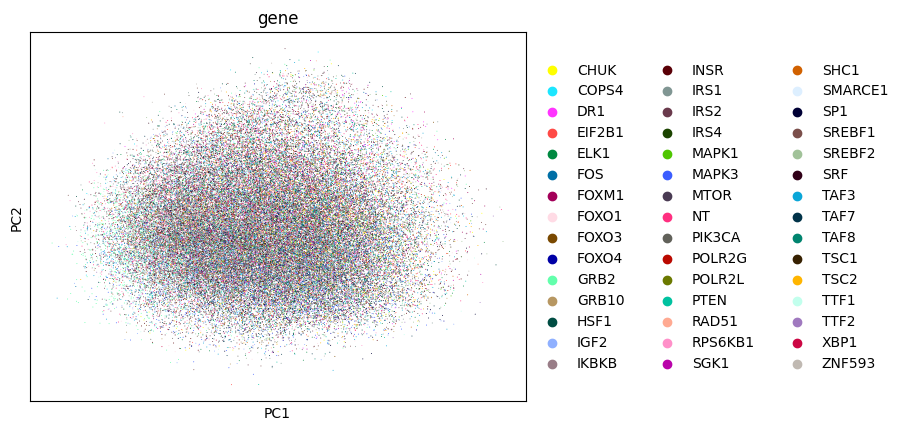

In [8]:
for cl in cell_line_adata:
    sc.pl.pca(cl, color='gene')

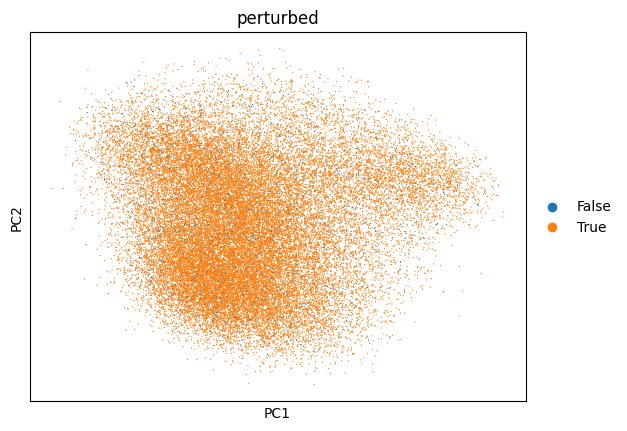

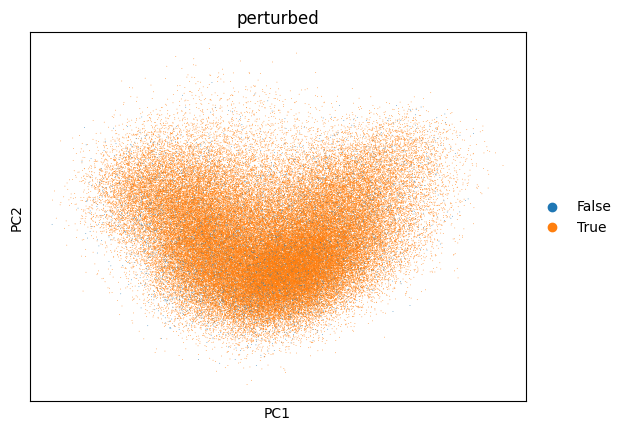

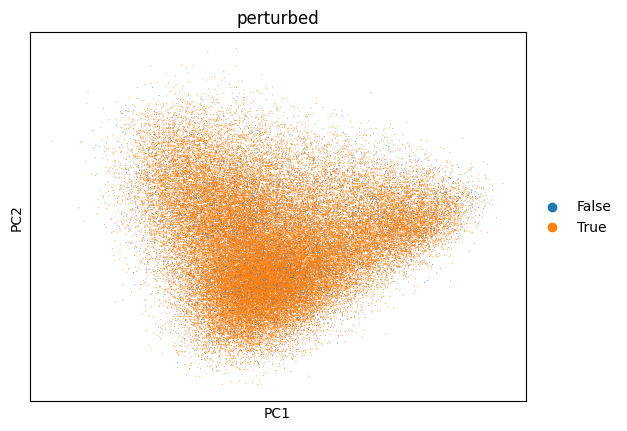

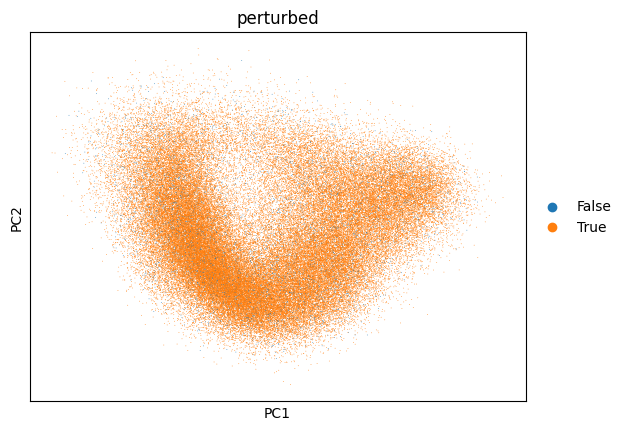

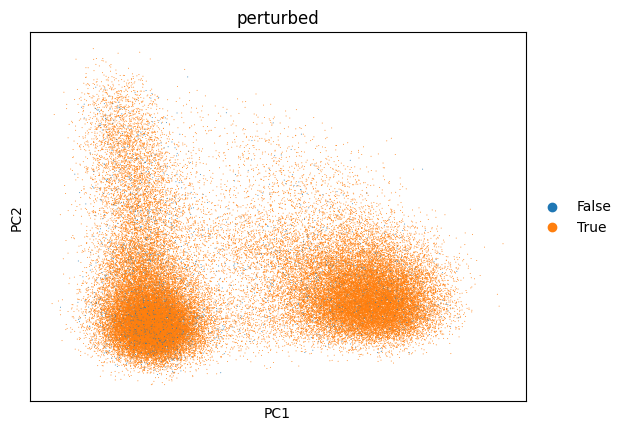

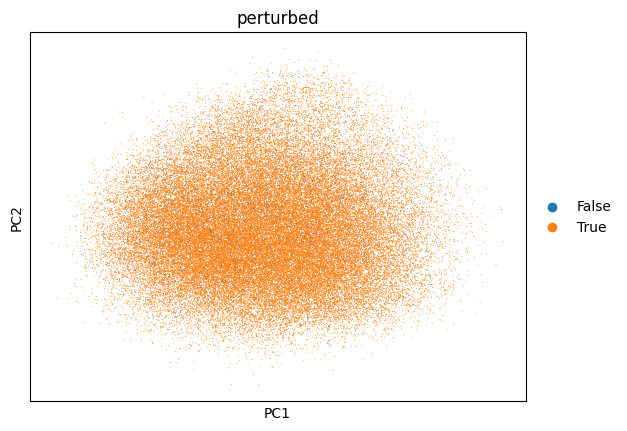

In [9]:
for cl in cell_line_adata:
    cl.obs['perturbed'] = cl.obs['gene'] != 'NT'
    sc.pl.pca(cl, color='perturbed')